# Lesson 10 Practise Assignment

## Import necessary Liabraries

In [477]:
import pandas as pd

In [478]:
import numpy as np

In [479]:
import matplotlib.pyplot as plt

In [480]:
import seaborn as sns

In [481]:
from sklearn.model_selection import train_test_split

In [482]:
from sklearn.linear_model import LinearRegression

In [483]:
from sklearn.metrics import mean_squared_error,r2_score

In [484]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [485]:
from sklearn.compose import ColumnTransformer

In [486]:
from sklearn.pipeline import Pipeline

## Create a Sample Dataset and load to DataFrame

In [487]:
data = {
  'Size': [1400,1600,1700,1875,1100,1550,2350,2450,1425,1700],
  'Bedrooms':[3,3,2,4,2,3,4,4,3,3],
  'Age':[10,15,20,5,25,12,7,10,8,10],
  'DistanceFromCityCenter':[10,15,20,10,30,12,5,7,8,12],
  'Price':[245000,312000,279000,308000,199000,219000,405000,324000,319000,255000]
}

In [488]:
df_homes_for_sale = pd.DataFrame(data)
df_homes_for_sale

,Size,Bedrooms,Age,DistanceFromCityCenter,Price
0,1400,3,10,10,245000
1,1600,3,15,15,312000
2,1700,2,20,20,279000
3,1875,4,5,10,308000
4,1100,2,25,30,199000
5,1550,3,12,12,219000
6,2350,4,7,5,405000
7,2450,4,10,7,324000
8,1425,3,8,8,319000
9,1700,3,10,12,255000


## Inspect Data / Apply EDA 

In [489]:
df_homes_for_sale.describe()

,Size,Bedrooms,Age,DistanceFromCityCenter,Price
count,10.000000,10.000000,10.000000,10.00000,10.000000
mean,1715.000000,3.100000,12.200000,12.90000,286500.000000
std,417.864944,0.737865,6.178817,7.35527,60185.361823
min,1100.000000,2.000000,5.000000,5.00000,199000.000000
25%,1456.250000,3.000000,8.500000,8.50000,247500.000000
50%,1650.000000,3.000000,10.000000,11.00000,293500.000000
75%,1831.250000,3.750000,14.250000,14.25000,317250.000000
max,2450.000000,4.000000,25.000000,30.00000,405000.000000


## Data Visualization

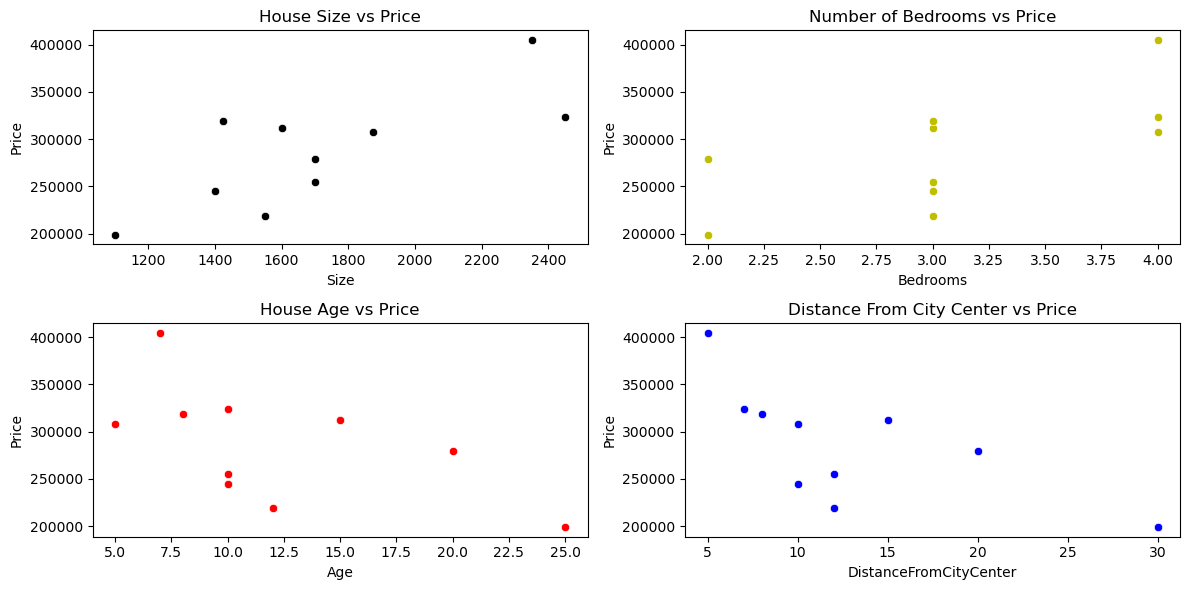

In [490]:
plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
sns.scatterplot(x='Size',y='Price', color='k', data=df_homes_for_sale)
plt.title('House Size vs Price')

plt.subplot(2,2,2)
sns.scatterplot(x='Bedrooms',y='Price', color='y', data=df_homes_for_sale)
plt.title('Number of Bedrooms vs Price')

plt.subplot(2,2,3)
sns.scatterplot(x='Age',y='Price', color='r', data=df_homes_for_sale)
plt.title('House Age vs Price')

plt.subplot(2,2,4)
sns.scatterplot(x='DistanceFromCityCenter',y='Price', color='blue', data=df_homes_for_sale)
plt.title('Distance From City Center vs Price')

plt.tight_layout()
plt.show()

## Feature Engineering: Create a column 'Age^2' to caputer non-linear efects

In [491]:
df_homes_for_sale['Age^2'] = df_homes_for_sale['Age'] **2

## Split Price data into training and testing sets

In [492]:
X = df_homes_for_sale.drop('Price',axis=1)
X

,Size,Bedrooms,Age,DistanceFromCityCenter,Age^2
0,1400,3,10,10,100
1,1600,3,15,15,225
2,1700,2,20,20,400
3,1875,4,5,10,25
4,1100,2,25,30,625
5,1550,3,12,12,144
6,2350,4,7,5,49
7,2450,4,10,7,100
8,1425,3,8,8,64
9,1700,3,10,12,100


In [493]:
y = df_homes_for_sale['Price']
y

0    245000
1    312000
2    279000
3    308000
4    199000
5    219000
6    405000
7    324000
8    319000
9    255000
Name: Price, dtype: int64

In [494]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Data Preprocesing

In [495]:
numeric_features = ['Size', 'Bedrooms', 'Age', 'DistanceFromCityCenter', 'Age^2']

In [496]:
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

## Preprocessor Pipeline

In [497]:
preprocessor = ColumnTransformer(transformers=[('num',numeric_transformer,numeric_features)])

## Define the model pipeline

In [498]:
model = Pipeline(steps=[('preprocessor',preprocessor),('regressor',LinearRegression())])

## Train the Model

In [499]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Size', 'Bedrooms', 'Age',
                                                   'DistanceFromCityCenter',
                                                   'Age^2'])])),
                ('regressor', LinearRegression())])

## Predict on the test set

In [500]:
y_pred = model.predict(X_test)

## Evaluate the model

In [501]:
mse = mean_squared_error(y_test,y_pred)
print("Maen Squared Error:",mse.round(2))



Maen Squared Error: 9856016637.01


In [502]:
r2 = r2_score(y_test,y_pred)
print("R^2 Score:",r2.round(2))


R^2 Score: -803.57


## Display the model coefficient

In [503]:

coefficients = model.named_steps['regressor'].coef_

In [504]:
coef_df = pd.DataFrame({'Features': numeric_features,'Coefficients':coefficients})
coef_df

,Features,Coefficients
0,Size,54751.655491
1,Bedrooms,-84209.104687
2,Age,-308628.296606
3,DistanceFromCityCenter,-128738.691472
4,Age^2,356343.210196


## Interpret the results

In [505]:
important_factors = coef_df.sort_values(by='Coefficients',key=abs,ascending=False)
important_factors.reset_index(drop=True,inplace=True)
important_factors

,Features,Coefficients
0,Age^2,356343.210196
1,Age,-308628.296606
2,DistanceFromCityCenter,-128738.691472
3,Bedrooms,-84209.104687
4,Size,54751.655491
